# Part 2 - The hidden layer

Welcome to Part 2!

Here, we'll implement a neural network with 2 layers (a hidden and output layer), and talk about feedforward and backpropagation. We'll take advantage of Numpy, a library that provides fast alternatives to math operations in Python and is designed to work efficiently with groups of numbers - like matrices.

## Index

- [Multi-layer perceptron](#multi-layer-perceptron)
- [The weights](#the-weigts)
- [Feedforward](#feedforward)
  - The hidden layer
  - The output layer
- [Backpropagation](#backpropagation)
  - Caculating the error
  - Learning
- Full implementation in a real case

## Multi-layer perceptron <a id='multi-layer-perceptron'></a>

In [Part 1](Part1.ipynb) we implemented the simplest neural network - a perceptron. This neural network doesn't have a hidden layer so it can't help us to find predictions to complex problems.

When we combine perceptrons so that the output of one becomes the input of another one, we form a multi-layer perceptron or a neural network.

Neural networks have a certain special architecture with layers:

![Neural network](img/part2/1.png)

- **Input layer:** contains the inputs $x_1$, $x_2$, $...$, $x_n$, $1$.
- **Hidden layer:** set of linear models created with the first input layer.
- **Output layer:** where the linear models get combined to obtain a nonlinear model.

Now, not all neural networks look like the one above. They can be way more complicated. In particular, we can do the following things:
- Add more nodes to the input, hidden and output layers.
- Add more layers.

The following image shows the network with which we will work, with its input units, labeled $x_1$, $x_2$, and $x_3$, its hidden nodes labeled $h_1$ and $h_2$, and all of the weights between the input layer and the hidden layer, labeled with their appropriate $w_{ij}$ indices:

![Neural network for this exercise](img/part2/2.png)

## The weigts <a id='the-weigts'></a>

The weights need to be stored in a **matrix**, indexed as $w_{ij}$. Each **row** in the matrix will correspond to the weights **leading out** of a **single input unit**, and each **column** will correspond to the weights **leading in** to a **single hidden unit**.

For our three input units and two hidden units, the weights matrix looks like this:

![Weights matrix](img/part2/3.png)

To initialize these weights in Numpy, we have to provide the shape of the matrix. If `features` is a 2D array containing the input data:

In [1]:
import numpy as np

# Use to same seed to make debugging easier
np.random.seed(21)

features = np.array([
    [1, 2, 3], 
    [4, 5, 6]])

# Number of records and input units
n_records, n_inputs = features.shape

# Input to hidden weights
n_hidden = 2
weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))

# Hidden to output weights
weights_hidden_to_output = np.random.normal(0, n_inputs**-0.5, size=n_hidden)

This creates a 2D array (i.e. matrix) named `weights_input_to_hidden` with dimensions `n_inputs` by `n_hidden`:

In [2]:
print(weights_input_to_hidden)

[[-0.03000157 -0.06419907]
 [ 0.60148166 -0.72557877]
 [ 0.43034978 -0.98787735]]


and a 2D array named `weights_hidden_to_output` with dimensions `n_hidden`:

In [3]:
print(weights_hidden_to_output)

[-0.11885586 -0.1354298 ]


## Feedforward <a id='feedforward'></a>

Feedforward is the process neural networks use to turn the input into an output:

![Feedforward](img/part2/4.png)

On a multi-layer perceptron or neural network, to calculate a prediction $\hat {y}\,$ we start with the unit vector $x$ and then we apply the first matrix $W^{(1)}$ and a sigmoid activation function to get the values in the second layer. Then we apply the second matrix $W^{(2)}$ and another sigmoid function to get the values on the third layer, and so on and so forth, until we get our final prediction $\hat y$. And this is the feedforward process that neural networks use to obtain the prediction from the input vector.

Let's see step by step this process with our neural network with two layers (hidden and output layer).

### The hidden layer

The input to a hidden unit is the sum of all the inputs multiplied by the hidden unit's weights. So for each hidden layer unit, $h_j$, we need to calculate the following:
$$
h_j = \sum_i w_{ij}x_i
$$

To do that, we need to use **matrix multiplication**.

In this case, we're multiplying the inputs (a row vector here) by the weights. To do this, you take the dot (inner) product of the inputs with each column in the weights matrix. For example, to calculate the input to the first hidden unit, $j=1$, you'd take the dot product of the inputs with the first column of the weights matrix, like so:

![Input to the first hidden unit](img/part2/5.png)

$$
h_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3
$$

And for the second hidden layer input, you calculate the dot product of the inputs with the second column. And so on and so forth.

In Numpy, you can do this for all the inputs and all the outputs at once using `np.dot`:

In [7]:
input = features[0]

# Calculate the inputs for the hidden layer
hidden_inputs = np.dot(input, weights_input_to_hidden)

print('input')
print(input)
print('\nweights_input_to_hidden')
print(weights_input_to_hidden)
print('\nhidden_inputs')
print(hidden_inputs)

input
[1 2 3]

weights_input_to_hidden
[[-0.03000157 -0.06419907]
 [ 0.60148166 -0.72557877]
 [ 0.43034978 -0.98787735]]

hidden_inputs
[ 2.46401109 -4.47898866]


Now that you have the inputs for the hidden layer, you calculate the outputs of that hidden layer passing the inputs through an activation function, which in this case we use the sigmoid function:

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

hidden_outputs = sigmoid(hidden_inputs)
hidden_outputs

array([ 0.92158004,  0.01121762])

After this process we have our neural network with values in each of its hidden units:

![Neural network with values in each of its hidden units](img/part2/6.png)

### The output layer

Now that you have the outputs for the hidden layer, it's time to calculate the input for the output unit, and this process is the same as with the hidden layer, but instead of multiplying the inputs by the hidden unit's weights, we multiply the outputs for the hidden layer by the output unit's weights:

In [9]:
output_inputs = np.dot(hidden_outputs, weights_hidden_to_output)

print('hidden_outputs')
print(hidden_outputs)
print('\nweights_hidden_to_output')
print(weights_hidden_to_output)
print('\noutput_inputs')
print(output_inputs)

hidden_outputs
[ 0.92158004  0.01121762]

weights_hidden_to_output
[-0.11885586 -0.1354298 ]

output_inputs
-0.11105438401


And finally, we calculate the sigmoid of the result to have our prediction $\hat y$:

In [10]:
output = sigmoid(output_inputs)
output

0.47226490306194757

![Prediction](img/part2/7.png)

## Backpropagation <a id='backpropagation'></a>

Training is the process that looks for the parameters a neural network should have on its edges (weights) in order to model our data well. One method used for training a neural network is backpropagation.

In a nutshell, backpropagation consists of:
- Calculating the error of the prediction.
- Running the feedforward operation backward (backpropagation) to spread the error to each of the weights.
- Use this to update the weights, and get a better model (learn).
- Continue this until we have a model that is good.

### Calculating the error

To update the weights to hidden layers we use an algorithm called gradient descent. In order to do this, you need to know how much error each of the hidden units contributed to the final output. Since the output of a layer is determined by the weights between layers, the error resulting from units is scaled by the weights going forward through the network. Since we know the error at the output, we can use the weights to work backward to hidden layers.

You can view this process as flipping the network over and using the error as the input:

![Backpropagation](img/part2/8.png)

In the output layer, you have error terms $\delta_k^0$ attributed to each output unit $k$:

$$
\delta_k^0 = (y_k - \hat {y_k}) \, f'(output_k)
$$

Remember that we are using the sigmoid for the activation function $f(h) = 1/(1+e^{-h})$ and:

$$
f'(h) = f(h)(1 - f(h))
$$

In [11]:
# The correct value we're trying to predict.
target = 0.6

# Calculate the network's output error
error = target - output

# Calculate the output layer's error term
output_error_term = error * output * (1 - output)

print('output_error_term')
print(output_error_term)

output_error_term
0.0318355158503


Then, the error attributed to hidden unit $j$ is the output error, scaled by the weights between the output and hidden layers (and the gradient):

$$
\delta_j^h = \sum W_{jk} \, \delta_k^0 \, f'(h_j)
$$

In [12]:
# Calculate the hidden layer's error term
hidden_error = output_error_term * weights_hidden_to_output
hidden_error_term =  hidden_error * hidden_outputs * (1 - hidden_outputs)

print('weights_hidden_to_output')
print(weights_hidden_to_output)
print('\noutput_error_term')
print(output_error_term)
print('\nhidden_error')
print(hidden_error)
print('\nhidden_outputs')
print(hidden_outputs)
print('\nhidden_error_term')
print(hidden_error_term)

weights_hidden_to_output
[-0.11885586 -0.1354298 ]

output_error_term
0.0318355158503

hidden_error
[-0.00378384 -0.00431148]

hidden_outputs
[ 0.92158004  0.01121762]

hidden_error_term
[ -2.73458970e-04  -4.78219744e-05]


![Neural network with error terms](img/part2/9.png)

### Learning

"Learning" takes our errors and tells each weight how it can change to reduce it.

Then, the change to the weights will be:

$$
\Delta w_{ij} = \eta \delta_j^h x_i
$$

where $w_{ij}$ are the weights between the inputs and hidden layer and $x_i$ are the input unit values. This form holds for however many layers there are. The weight steps are equal to the learning rate times the output error of the layer times the values of the inputs to that layer:

$$
\Delta w_{pq} = \eta \delta_{output} V_{in}
$$

Here, you get the output error, $\delta_{output}$, by propagating the errors backward from higher layers. And the input values, $V_{in}$ are the inputs to the layer, the hidden layer activations to the output unit for example.

In [13]:
learnrate = 0.1

# Calculate change in weights for hidden layer to output layer
delta_weights_hidden_to_output = learnrate * output_error_term * hidden_outputs

# Calculate change in weights for input layer to hidden layer
delta_weights_input_to_hidden = learnrate * hidden_error_term * input[:, None]

print('output_error_term =', output_error_term)
print('hidden_outputs = ', hidden_outputs)
print('Change in weights for hidden layer to output layer:')
print(delta_weights_hidden_to_output)

print('\nhidden_error_term = ', hidden_error_term)
print('input = ', input)
print('Change in weights for input layer to hidden layer:')
print(delta_weights_input_to_hidden)

output_error_term = 0.0318355158503
hidden_outputs =  [ 0.92158004  0.01121762]
Change in weights for hidden layer to output layer:
[  2.93389758e-03   3.57118668e-05]

hidden_error_term =  [ -2.73458970e-04  -4.78219744e-05]
input =  [1 2 3]
Change in weights for input layer to hidden layer:
[[ -2.73458970e-05  -4.78219744e-06]
 [ -5.46917940e-05  -9.56439489e-06]
 [ -8.20376911e-05  -1.43465923e-05]]


With the changes in weights computed, our new weights are:

In [14]:
print('Old weights for hidden layer to output layer:')
print(weights_hidden_to_output)

print('\nOld weights for input layer to hidden layer:')
print(weights_input_to_hidden)

# Calculate new weights
new_weights_hidden_to_output = weights_hidden_to_output + delta_weights_hidden_to_output
new_weights_input_to_hidden = weights_input_to_hidden + delta_weights_input_to_hidden

print('\n\nNew weights for hidden layer to output layer:')
print(new_weights_hidden_to_output)

print('\nNew weights for input layer to hidden layer:')
print(new_weights_input_to_hidden)

Old weights for hidden layer to output layer:
[-0.11885586 -0.1354298 ]

Old weights for input layer to hidden layer:
[[-0.03000157 -0.06419907]
 [ 0.60148166 -0.72557877]
 [ 0.43034978 -0.98787735]]


New weights for hidden layer to output layer:
[-0.11592196 -0.13539409]

New weights for input layer to hidden layer:
[[-0.03002892 -0.06420385]
 [ 0.60142697 -0.72558833]
 [ 0.43026774 -0.9878917 ]]


You may think that this was a tiny change in our weights, but this process was realized with the input data of just one record. In order to find a better model (with better weights and predictions), you have to iterate this process in your whole dataset a lot of times. We'll do this next.

The takeaway is that you understand how all the pieces that allow a neural network "learn" fit together.

## Full implementation in a real case

Now it's time to see all this pieces in action.

As an example, we're going to train a network on graduate school admissions data (found at [http://www.ats.ucla.edu/stat/data/binary.csv.](http://www.ats.ucla.edu/stat/data/binary.csv.)). This dataset has 3 input features:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

Institutions with rank 1 have the highest prestige, those with rank 4 have the lowest.

The goal here is to predict if a student will be admitted to a graduate program based on those features. For this, we'll consider a simple network with one hidden layer and one output unit. We'll use a sigmoid function for the output unit activation.

The process is the following:
- Loading the data
- Data preparation
- Initialize hyperparameters and weights
- Iterate $N$ epochs
 - For each record in the training data
   - Calculate the output
   - Calculate the network's prediction error
   - Calculate error term for the output unit
   - Calculate the hidden layer's contribution to the error
   - Calculate error term for the hidden layer
   - Update weights
- Calculate accuracy on test data

### Loading the data

We'll use the packages called Pandas and Numpy to load the data and format it nicely.

In [33]:
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('data/part2.csv')
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


Now, let's make a plot of our data to see how it looks. For the first plot, let's ignore the rank.

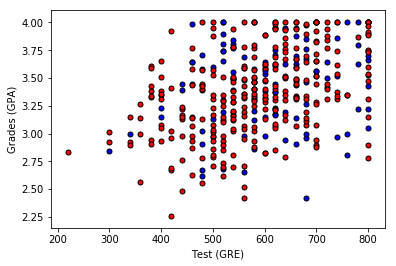

In [19]:
import matplotlib.pyplot as plt

def plot_points(data):
    X = np.array(data[['gre', 'gpa']])
    y = np.array(data['admit'])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=25, color='blue', edgecolor='k')
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color='red', edgecolor='k')
    plt.ylabel('Grades (GPA)')
    plt.xlabel('Test (GRE)')

plot_points(data)
plt.show()

Unfortunately, the data is not nicely separated. Maybe we could take into account the ranks. Let's make 4 plots, each one for each rank.

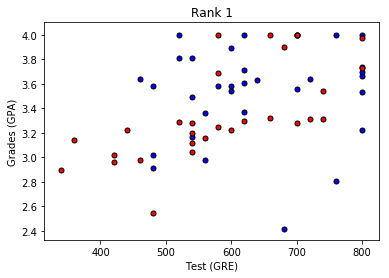

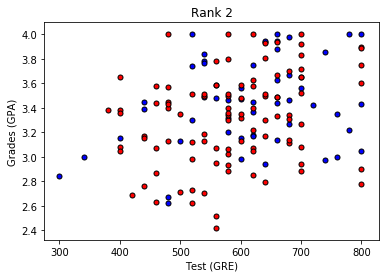

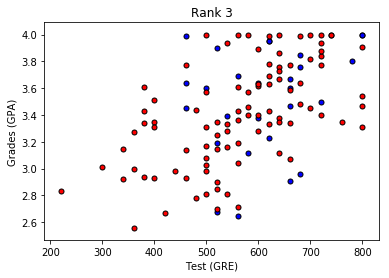

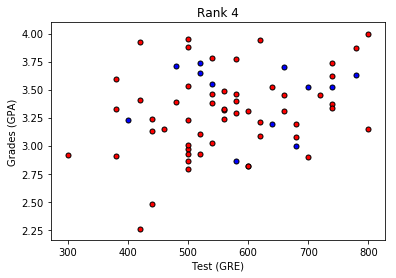

In [20]:
# Separating the data for each rank
data_rank1 = data[data['rank']==1]
data_rank2 = data[data['rank']==2]
data_rank3 = data[data['rank']==3]
data_rank4 = data[data['rank']==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title('Rank 1')
plt.show()

plot_points(data_rank2)
plt.title('Rank 2')
plt.show()

plot_points(data_rank3)
plt.title('Rank 3')
plt.show()

plot_points(data_rank4)
plt.title('Rank 4')
plt.show()

The 4 plots gives us more information, if you look closer, you can see that the lower the rank, the higher the acceptance rate. We'll use the rank as one of our inputs, but in order to do that, we need to one-hot encode it.

### Data preparation

#### One-hot encoding the rank

One-hot encoding is the process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. In our case, instead of having one variable (rank) with values 1-4, we'll have 4 variables (rank1, rank2, rank3 and rank4) with values 1 or 0. We have to do this to avoid our neural network be biased by the values 1-4 and make correlations when there aren't.

One-hot encoding is easy with `get_dummies` function in numpy.

In [21]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


#### Scalling the data

There is a problem with our data. The range for grades is 1.0-4.0, whereas the range for test scores is 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. To fix that, we need to scale our data, and we'll do this fitting our 2 features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [37]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.225625,0,0,1,0
1,1,0.825,0.229375,0,0,1,0
2,1,1.000,0.250000,1,0,0,0
3,1,0.800,0.199375,0,0,0,1
4,0,0.650,0.183125,0,0,0,1
5,1,0.950,0.187500,0,1,0,0
6,1,0.700,0.186250,1,0,0,0
7,0,0.500,0.192500,0,1,0,0
8,1,0.675,0.211875,0,0,1,0
9,0,0.875,0.245000,0,1,0,0


### Splitting the data into Training and Testing set

On the training process, we have a training set and a testing set. We train our models in the training set without looking at the testing set, and then we evaluate the results on the testing set to see how we did. The size of the testing set will be 10% of the total data.

In [43]:
# Use to same seed to make debugging easier
np.random.seed(21)

sample = np.random.choice(processed_data.index, size=int(len(processed_data) * 0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print("\ntrain_data (first 10 rows):")
print(train_data[:10])
print("\ntest_data (first 10 rows):")
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40

train_data (first 10 rows):
     admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
106      1  0.875  0.222500       1       0       0       0
9        0  0.875  0.245000       0       1       0       0
61       0  0.700  0.207500       0       0       0       1
224      0  1.000  0.181250       0       1       0       0
37       0  0.650  0.181250       0       0       1       0
242      1  0.850  0.185000       0       0       1       0
313      1  0.650  0.228125       0       0       0       1
52       0  0.925  0.210625       0       0       0       1
347      0  0.725  0.237500       0       1       0       0
239      0  0.875  0.215625       0       0       1       0

test_data (first 10 rows):
     admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
48       0  0.550  0.155000       0       0       0       1
50       0  0.800  0.241250       0       0       1       0
80       0  0.875  0.181250       0  

### Splitting the data into Features and Targets (labels)

Finally, we'll split the data into features (X) and targets (y).

In [44]:
features, targets = train_data.drop('admit', axis=1), train_data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

`features` contains the records for each student (with our six inputs each one):

In [45]:
features.shape

(360, 6)

In [46]:
features[:10]

,gre,gpa,rank_1,rank_2,rank_3,rank_4
106,0.875,0.222500,1,0,0,0
9,0.875,0.245000,0,1,0,0
61,0.700,0.207500,0,0,0,1
224,1.000,0.181250,0,1,0,0
37,0.650,0.181250,0,0,1,0
242,0.850,0.185000,0,0,1,0
313,0.650,0.228125,0,0,0,1
52,0.925,0.210625,0,0,0,1
347,0.725,0.237500,0,1,0,0
239,0.875,0.215625,0,0,1,0


and `targets` the expected values we try to predict (if a student was admitted to a graduate program based on his data - 1 if admitted, 0 otherwise)

In [47]:
targets.shape

(360,)

In [48]:
targets[:10]

106    1
9      0
61     0
224    0
37     0
242    1
313    1
52     0
347    0
239    0
Name: admit, dtype: int64

# Feedback